In [1]:
#Loading Appropriate Libs

#linear Algebra
import numpy as np

#to process dataset (csv) file
import pandas as pd

#for plot interactive graphic and imaging
import seaborn as sns

#for plotting graphs
import matplotlib.pyplot as plt

#the following libs will be for scikit-learn
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

#decision tree classifier & visual
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydt
from sklearn import tree

#bringing down the Confusion Matrix package
from sklearn.metrics import confusion_matrix

#Accuracy scores
from sklearn.metrics import accuracy_score

#lib to be used for performing bayes model
from sklearn.naive_bayes import GaussianNB

#KNN lib model
from sklearn.neighbors import KNeighborsClassifier

#train split
from sklearn.model_selection import train_test_split


In [2]:
#loading the data
df = pd.read_csv('heart-ch.csv')

<font size = 5px><b> Data Exlporation + Visualization </b> </font>

In [3]:
#show the top 10 rows
df.head(10)

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,f,left_vent_hyper,185.0,no,0.0,NaN,NaN,NaN,'<50'
1,29,1,2,120.0,243.0,f,normal,160.0,no,0.0,NaN,NaN,NaN,'<50'
2,29,1,2,140.0,NaN,f,normal,170.0,no,0.0,NaN,NaN,NaN,'<50'
3,30,0,1,170.0,237.0,f,st_t_wave_abnormality,170.0,no,0.0,NaN,NaN,fixed_defect,'<50'
4,31,0,2,100.0,219.0,f,st_t_wave_abnormality,150.0,no,0.0,NaN,NaN,NaN,'<50'
5,32,0,2,105.0,198.0,f,normal,165.0,no,0.0,NaN,NaN,NaN,'<50'
6,32,1,2,110.0,225.0,f,normal,184.0,no,0.0,NaN,NaN,NaN,'<50'
7,32,1,2,125.0,254.0,f,normal,155.0,no,0.0,NaN,NaN,NaN,'<50'
8,33,1,3,120.0,298.0,f,normal,185.0,no,0.0,NaN,NaN,NaN,'<50'
9,34,0,2,130.0,161.0,f,normal,190.0,no,0.0,NaN,NaN,NaN,'<50'


As we can see above, the data containes multiple values with no data or blank fields. I will make a few adjustments ot the dataset in order to make our data exploration easier and more clear to understand.

In [4]:
#modified dataset
df = pd.read_csv('heart-rev.csv')

In [5]:
#show the top 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


The data above shows the changes made to the dataset to make the data exploration and analysis more understandable and numeric. 
The columns above are described as follow:

1.  Age : Person/subjects' age in years
2.  Sex : Subjects sex 1 = male ; 0 = female
3.  cp: chest pain experienced
     > 0 = typical angina
     > 1 = atypical angina
     > 2 = non-anginal pain
     > 3 = asymptomatic
4.  trestbps : subject's resting blood pressure mmHg
5.  chol : subject's cholesterol mg/dL
6.  fbs : subject's fasted blood sugar; >120 mg/dL, 1= True; 2 = False
7.  retecg : Resting electrocardiographic measurement; 0=normal, 1= show ST-T wave abnormality, 2= showing definite or probable left ventricular hypertrophy
8.  thalach : persons maximum heart rate achieved
9.  exang : exercise induced angina; 1= yes, 0 = no
10. oldpeak : ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment
12. ca : number of major vessels (0-3) colored by flourosopy 
13. thal : Thalassemia blood disorder 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. num : diagnosis of heart disease (angiographic disease status); 0= no, 1= yes

In [6]:
#the describe function shows an analysis among the num values present in the data set.
#this function will display the mean, sd., count, min, max... 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# the shape function will return the dimension of the dataframe (df) 
# this will help to see the data boundaries
df.shape

(303, 14)

The data set contains 303 rows and 14 columns. Note the row number is without counting column names. 

In [8]:
# checking for null values in the data then adds how many nulls there are per column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There are currently no nulls in the data since the data set has been modified to get rid of null values. 

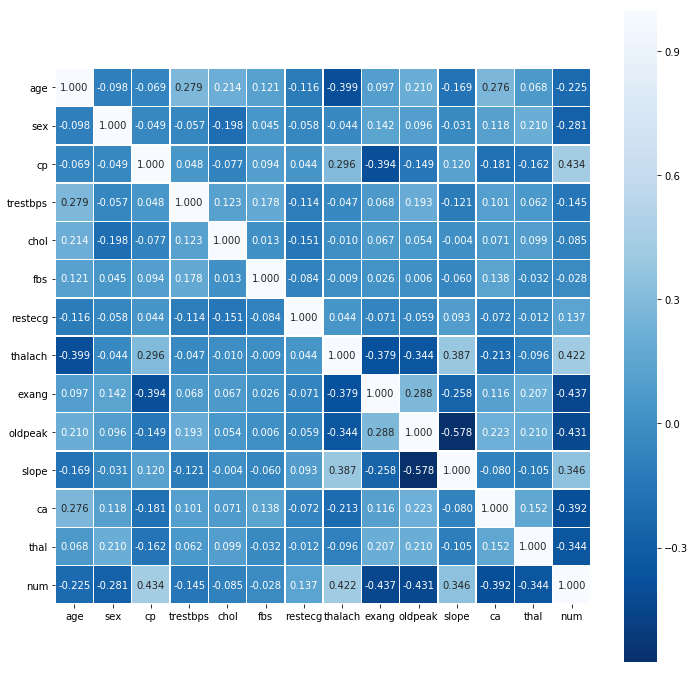

In [9]:
#matplot lib to plot a correlation heatmap
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'Blues_r', square = True, linewidths = .5)
plt.show()

By looking at the heatmap above we can see that we have multiple indicators that show high levels of correlation. We can see that Thalach, slope and CP are highly correlated as we can see that the values closer to +1 or -1.

In [10]:
#counting values for num
df.num.value_counts()

1    165
0    138
Name: num, dtype: int64

So we have 165 cases of heart disease and 138 cases of no heart disease

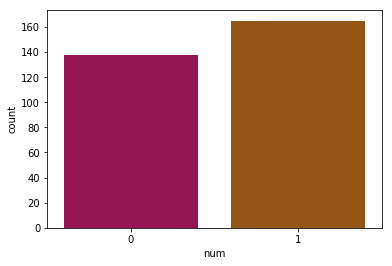

In [11]:
#Visualizing the counts
sns.countplot(x = 'num', data = df, palette = "brg")
plt.show()

<font size = 3px><b> Age</b></font>

In [12]:
#finding the mean max and mean age of the subjects
age_min = min(df.age)
age_max = max(df.age)
age_mean = df.age.mean()

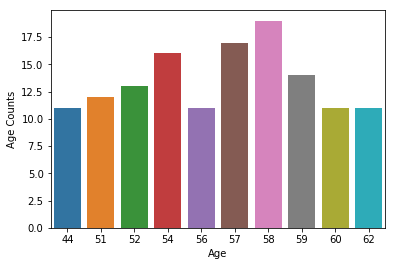

In [13]:
#plot the counts for the age column and visualize it
sns.barplot(x = df.age.value_counts() [:10].index, y = df.age.value_counts()[:10].values)#split values into 10 bars
plt.xlabel('Age')
plt.ylabel('Age Counts')
plt.show()

<font size = 3px><b> Gender/Sex</b></font>

In [14]:
#displays sex count values
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

207 males and 96 females, we can tell that there were definetly a significant amount of males in comparison to females.

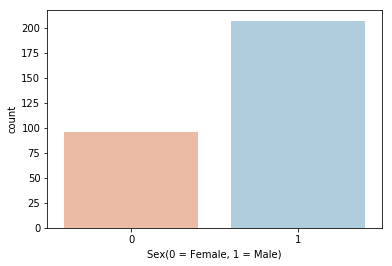

In [15]:
#creating plot to visualize the sex counts in the dataset 
sns.countplot(x='sex', data = df ,palette = "RdBu")
plt.xlabel("Sex(0 = Female, 1 = Male)")
plt.show()

As the count for male and female is so much different, we can try to plot the a graph of gender and compare it to the counts of how much the difference is in their num values

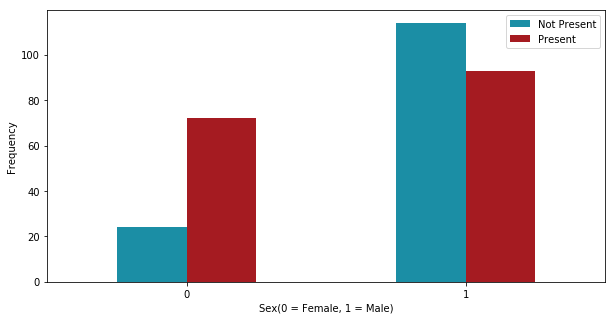

In [16]:
#create a crosstab of data
pd.crosstab(df.sex, df.num).plot(kind = 'bar', color = ['#1b8ea5', '#a51b21'], figsize =(10,5) )
plt.legend(["Not Present", "Present"])
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

From the graph above the data shows that women are more than 60% more likely than men to have heart disease present. As the graph shows the count of women comapared to men, showing the likelyhood of heart disease to be present for women more often than men.

<font size = 3px><b> Symptoms: Chest Pain</b></font>

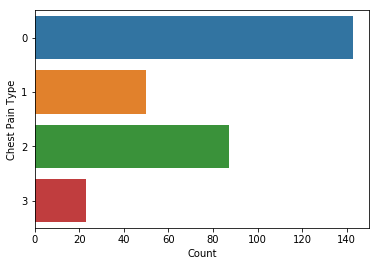

In [17]:
# count the plots in the data for chest pain
sns.countplot(y ='cp', data = df)
plt.ylabel('Chest Pain Type')
plt.xlabel("Count")
plt.show()

Looking back at the values 

 cp: chest pain experienced
     > 0 = typical angina
     > 1 = atypical angina
     > 2 = non-anginal pain
     > 3 = asymptomatic
 
 We can see that typical angina and non-anginal pain are the most frequent in the data set


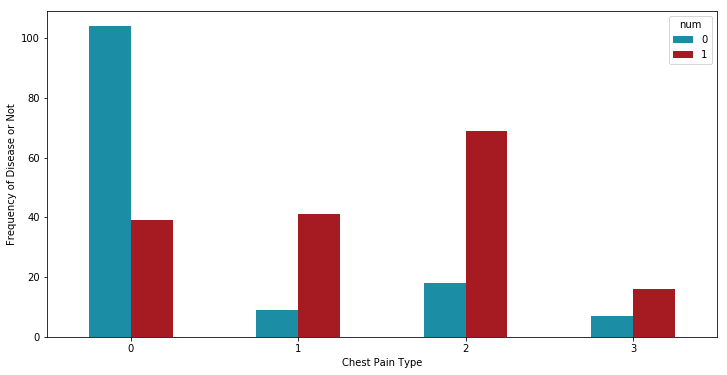

In [18]:
#plot of crosstab visualizing the chest pain type and the frequecy of the disease
pd.crosstab(df.cp,df.num).plot(kind="bar",figsize=(12,6),color=['#1b8ea5', '#a51b21'])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

It is less common for heart disease to be present when the chest pain type is for typical angina and for asymptomatic which makes sence. Now we can definitely see that the highest presence of chest pain are for those subjects showing non-anginal pain, which is very interesting since these cases are not usually further investigate for unsual anginal pain.

<font size = 3px><b> Thalach</b></font>

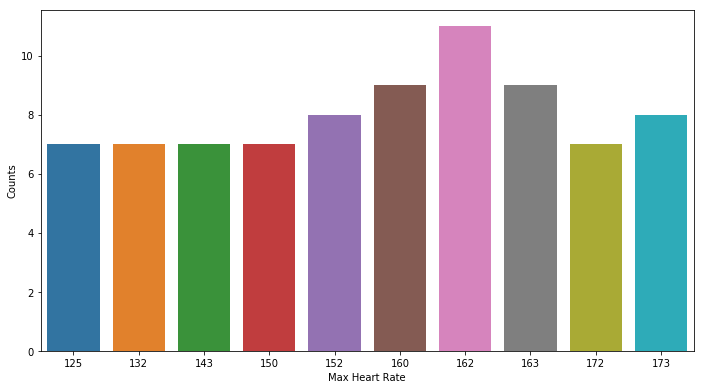

In [19]:
#Max hr achieved
sns.barplot(x=df.thalach.value_counts()[:10].index,y=df.thalach.value_counts()[:10].values)
plt.xlabel('Max Heart Rate')
plt.ylabel('Counts')
plt.gcf().set_size_inches(11.7, 6.27)
plt.show()

We can see above that max heart rate achived was 162

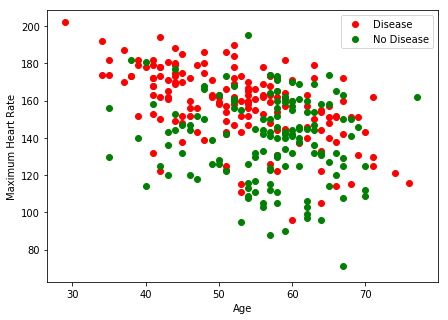

In [20]:
#dispaying graph showing the maximum hr in respect to the subject's age
plt.scatter(x=df.age[df.num==1], y=df.thalach[(df.num==1)], c="red")
plt.scatter(x=df.age[df.num==0], y=df.thalach[(df.num==0)], c= "green")
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.gcf().set_size_inches(7, 5)
plt.show()

As the visualization shows above, there seems to be a trend in the disease points being more present where the hr is higher. The data shows that subjects with the HR above 140 had a higher frequency in heart disease. 

<font size = 3px><b> Creating Dummy Variables for the Model</b></font>

In [21]:
#creating the dummy variables from CP, Thalach and slope since the are categorical variables
#turns data column into dummy var 

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [22]:
frames = [df, a, b, c]
#combines dummy vars into one frame
df = pd.concat(frames, axis = 1)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1
5,57,1,0,140,192,0,1,148,0,0.4,...,0,0,0,0,1,0,0,0,1,0
6,56,0,1,140,294,0,0,153,0,1.3,...,1,0,0,0,0,1,0,0,1,0
7,44,1,1,120,263,0,1,173,0,0.0,...,1,0,0,0,0,0,1,0,0,1
8,52,1,2,172,199,1,1,162,0,0.5,...,0,1,0,0,0,0,1,0,0,1
9,57,1,2,150,168,0,1,174,0,1.6,...,0,1,0,0,0,1,0,0,0,1


In [23]:
#removing the following columns from the df
df = df.drop(columns = ['cp', 'thal', 'slope'])#drop original data columns to use the dummy vars
df.head(10)#shows top 10 values

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
5,57,1,140,192,0,1,148,0,0.4,0,...,0,0,0,0,1,0,0,0,1,0
6,56,0,140,294,0,0,153,0,1.3,0,...,1,0,0,0,0,1,0,0,1,0
7,44,1,120,263,0,1,173,0,0.0,0,...,1,0,0,0,0,0,1,0,0,1
8,52,1,172,199,1,1,162,0,0.5,0,...,0,1,0,0,0,0,1,0,0,1
9,57,1,150,168,0,1,174,0,1.6,0,...,0,1,0,0,0,1,0,0,0,1


<font size = 5px><b> KNN Classification </b> </font>

This will be the first Machine Learning model used to analyze the data and determine how the model tests against the dataset. An accuracy percentage will be determine after the model is run. K-Nearest Neighbors (KNN) model can be used for both classification and regression. KNN algorithms is based on feature similarity or how closely out-of-sample the features resemble the training set will determine how the data point is classified. 

In [24]:
#normalizing data
y = df.num.values
x_dat = df.drop(['num'],axis = 1)

In [25]:
#normalize
x = (x_dat - np.min(x_dat))/(np.max(x_dat)- np.min(x_dat)).values

In [26]:
#splitting model 80/20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [27]:
#transposing the matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [28]:
#preparing the KNN model
#n_neigh = k
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.05%


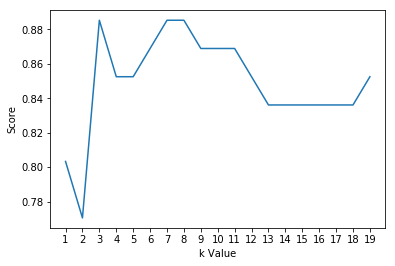

In [29]:
#looking for the best fitting K value
scrList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train.T, y_train.T)
    scrList.append(knn2.score(x_test.T, y_test.T))

plt.plot(range(1,20), scrList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("k Value")
plt.ylabel("Score")
plt.show()


In [30]:
print("Max KNN Score: {:.2f}%".format((max(scrList))*100))

Max KNN Score: 88.52%


We can see above that the model accuracy was 88.52%

<font size = 5px><b> Decision Tree Classification </b> </font>

In [31]:
dtc = DecisionTreeClassifier()#calling decision tree lib package
dtc.fit(x_train.T, y_train.T)#fitting training model
print("Decision Tree Accuracy: {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))#display accuracy % determined

Decision Tree Accuracy: 78.69%


As we can see above, using a decision tree model we can achieve an accuracy rate of 80.33%. Now we can use a Random Forest Model to test how the accuracy will be affected given that we have already seen what a classification tree obtains. We should be able to see, that the accuracy rate should increase given a bigger pool for decision prediction.

<font size = 3px><b> Decision Tree Classification Visualization</b> </font>

In [32]:
tree.export_graphviz(dtc, out_file='tree.dot')

<font size = 5px><b> Random Forest Classification </b> </font>

In [33]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)#calling randomF 
rf.fit(x_train.T, y_train.T)#fitting the train models from transposing matrices

#to print the output accuracy determined
print ("the Random Forest Accuracy : {:.2f}%". format(rf.score(x_test.T, y_test.T)*100))

the Random Forest Accuracy : 88.52%


As predicted, the Random Forest model has 8.19% increase in accuracy from the decision tree model. Below is the model will be compared and visualized to clearly see which models performed the best.

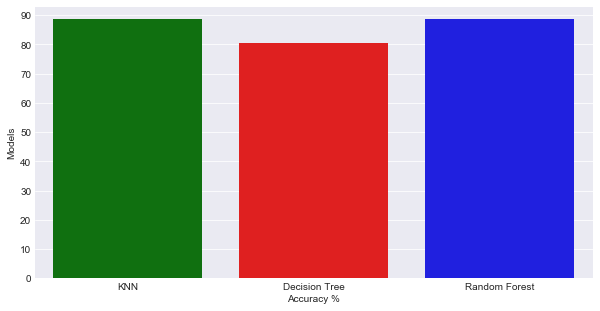

In [34]:
#graphing the ouputs to compare model accuracy
methds = ["KNN", "Decision Tree", "Random Forest"]#models used
accu = [88.52, 80.33, 88.52]#the accuracy from above models
cols = ["green", "red", "blue"]#colors to use below

sns.set_style("darkgrid")#set the syle of the grid background
plt.figure(figsize = (10,5))#size of the visualization
plt.yticks(np.arange(0,100,10)) #numpy lib to arange data
plt.xlabel("Accuracy %")#x-axis labels
plt.ylabel("Models")#y-axis labels
sns.barplot(x = methds, y= accu, palette = cols)#plotting vars defined above
plt.show()#display graph




<font size = 5px><b> Confusion Matrix
    </b> </font>

The following confusion matrix will be used to describe the performance of the model using the set of test that which the values are present and known in the dataset. 

In [35]:
#defining the predicted values and
#preparinf matrices vars

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)

y_head_knn = knn3.predict(x_test.T) #for knn model
y_head_dtc = dtc.predict(x_test.T)# for decition tree classification
y_head_rf = rf.predict(x_test.T)#for random forest classification model


In [36]:
#creating the vars with the conf matrix lib and adding model data form vars created above
conm_knn = confusion_matrix (y_test, y_head_knn) #for knn
conm_dtc = confusion_matrix (y_test, y_head_dtc)#for decision tree
conm_rf = confusion_matrix (y_test, y_head_rf)#for random forest

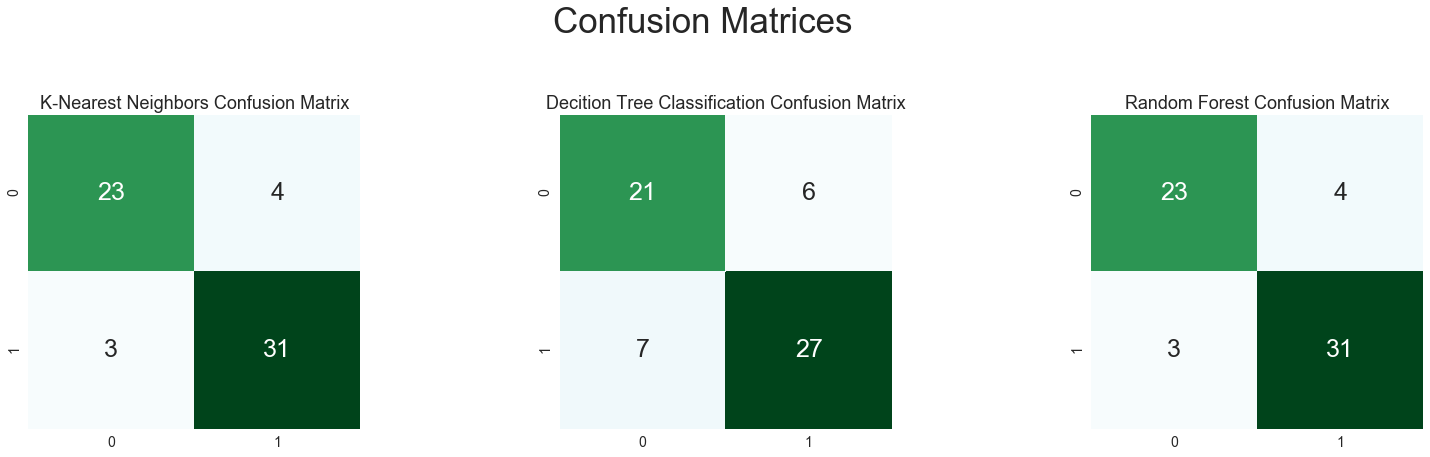

In [37]:
#ploting the data to visualize the matrices
plt.figure(figsize = (25,15))#vizualization dimensions 
sns.set(font_scale=1.4)

plt.suptitle("Confusion Matrices", fontsize = 35)#font size
plt.subplots_adjust(wspace = 0.6, hspace =0.6)#padding

#matrix creation for knn
plt.subplot(2,3,1)#plot loc on grid
plt.title("K-Nearest Neighbors Confusion Matrix", fontsize=18)#title
sns.heatmap(conm_knn, cmap ="BuGn", fmt = "d", cbar = False, annot = True, annot_kws={"size": 25})#setting parameters for heatmap

#matrix creation for dtc
plt.subplot(2,3,2)#plot loc on grid
plt.title("Decition Tree Classification Confusion Matrix", fontsize=18)#title
sns.heatmap(conm_dtc, cmap ="BuGn", fmt = "d", cbar = False, annot = True, annot_kws={"size": 25})#setting parameters for heatmap

#matrix for random forest classification
plt.subplot(2,3,3)#plot loc on grid
plt.title("Random Forest Confusion Matrix", fontsize=18)#title
sns.heatmap(conm_rf, cmap ="BuGn", fmt = "d", cbar = False, annot = True, annot_kws={"size": 25})#setting parameters for heatmap

plt.show()#show matrices

